<h1></h1>
<h2><center> ETI195 - Ética para Ciencia de Datos y Estadística </center></h2>

<h1></h1>
<h2><center> Taller 1: Análisis COMPAS </center></h2>



## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Carga de datos

In [2]:

compas = pd.read_csv(
    "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
)


## Columnas de interés:

1. `age` - Edad del acusado. Variable numérica.
2. `age_cat` - Categoría de edad. Puede ser < 25, 25-45, >45.
3. `sex` - Sexo del acusado. Puede ser  'Male' o 'Female'.
4. `race` - Raza del acusado. Puede ser 'African-American', 'Caucasian', 'Hispanic', 'Asian', o 'Other'.
5. `c_charge_degree` - Grado del crimen. Es o bien M (Misdemeanor), F (Felony), u O (Ordinary traffic offense).
6. `priors_count` - Número de crimenes anteriores cometidos por el acusado. Variable numérica.
7. `days_b_screening_arrest` - Días entre el arresto y la fecha del cargo por el delito registrado en COMPAS.
8. `decile_score` - Puntaje COMPAS predicho por el sistema. Toma valores entre 0 y 10.
9. `score_text` - Categoría de decile_score. Puede ser Low (1-4), Medium (5-7), y High (8-10).
10. `is_recid` - Variable que indica si un acusado es reincidente o no. Puede tomar valores 1, 0 o -1.
11. `two_year_recid` - Variable que indica si un acusado tuvo reincidencia dentro de un período de dos años.
12. `c_jail_in` - Momento en que el acusado fue ingresado a la cárcel.
13. `c_jail_out` - Momento en que el acusado fue liberado de la cárcel.

In [3]:
# Mantenemos las columnas de interés.

columns = [
    "age",
    "c_charge_degree",
    "race",
    "age_cat",
    "score_text",
    "sex",
    "priors_count",
    "days_b_screening_arrest",
    "decile_score",
    "is_recid",
    "two_year_recid",
    "c_jail_in",
    "c_jail_out",
]

compas = compas[columns]

In [4]:
# Aplicamos los filtros necesarios para limpiar el dataset según las condiciones dadas.
clean_df = compas[
    (
        (compas["days_b_screening_arrest"] <= 30)
        & (compas["days_b_screening_arrest"] >= -30)
        & (compas["is_recid"] != -1)
        & (compas["c_charge_degree"] != "O")
    )
]

In [6]:
age_count = clean_df["age_cat"].value_counts(normalize=True) * 100
race_count = clean_df["race"].value_counts(normalize=True) * 100
sex_count = clean_df["sex"].value_counts(normalize=True) * 100

# Variables que serán utilizadas para el análisis.

## Análisis exploratorio

### Distribución de la edad

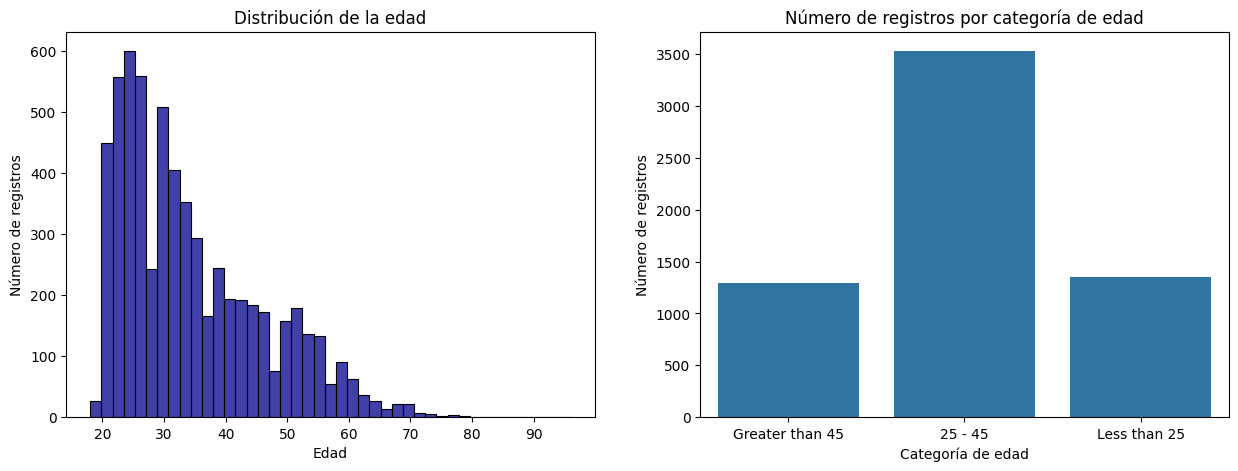

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

sns.histplot(data=clean_df, x="age", color="darkblue", ax=ax[0])
sns.countplot(data=clean_df, x="age_cat", ax=ax[1])

ax[0].set_title("Distribución de la edad")
ax[1].set_title("Número de registros por categoría de edad")

ax[0].set_xlabel("Edad")
ax[1].set_xlabel("Categoría de edad")

ax[0].set_ylabel("Número de registros")
ax[1].set_ylabel("Número de registros")

plt.show()

In [8]:
age_count

# Porcentualmente indica la categoría de edad de los registros.

age_cat
25 - 45            57.226183
Less than 25       21.824368
Greater than 45    20.949449
Name: proportion, dtype: float64

#### Interseccionalidad (edad)

In [9]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["race"],
    index=clean_df["age_cat"],
    aggfunc=lambda x: len(x),
    normalize="all",
) * 100

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
age_cat,,,,,,
25 - 45,30.751782,0.226831,18.276086,4.714841,0.113415,3.143227
Greater than 45,7.582631,0.178224,10.174984,1.766040,0.032404,1.215165
Less than 25,13.107583,0.097213,5.622165,1.766040,0.032404,1.198963


### Distribución de la raza

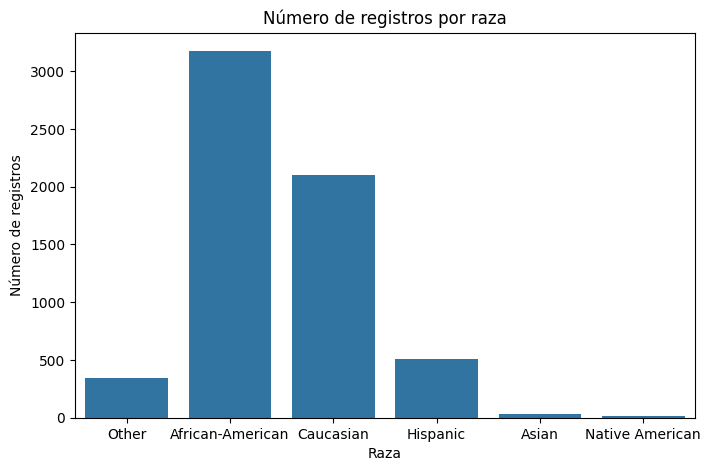

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.countplot(x=clean_df["race"])
plt.title("Número de registros por raza")
plt.xlabel("Raza")
plt.ylabel("Número de registros")
plt.show()

In [11]:
race_count

# Porcentualmente indica la raza de los registros.

race
African-American    51.441996
Caucasian           34.073234
Hispanic             8.246922
Other                5.557356
Asian                0.502268
Native American      0.178224
Name: proportion, dtype: float64

### Interseccionalidad (raza)


In [12]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["age_cat"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

age_cat,25 - 45,Greater than 45,Less than 25
race,,,
African-American,59.779528,14.740157,25.480315
Asian,45.161290,35.483871,19.354839
Caucasian,53.637660,29.862102,16.500238
Hispanic,57.170923,21.414538,21.414538
Native American,63.636364,18.181818,18.181818
Other,56.559767,21.865889,21.574344


In [13]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["age_cat"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="all",
) * 100

# Notar la diferencia entre normalize="index" y normalize="all" en el cálculo de porcentajes.

age_cat,25 - 45,Greater than 45,Less than 25
race,,,
African-American,30.751782,7.582631,13.107583
Asian,0.226831,0.178224,0.097213
Caucasian,18.276086,10.174984,5.622165
Hispanic,4.714841,1.766040,1.766040
Native American,0.113415,0.032404,0.032404
Other,3.143227,1.215165,1.198963


### Distribución del sexo

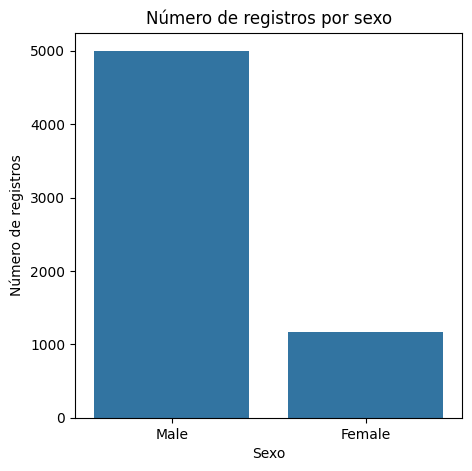

In [14]:
fig, ax = plt.subplots(1, figsize=(5, 5))
sns.countplot(x=clean_df["sex"])
plt.title("Número de registros por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de registros")
plt.show()

In [15]:
sex_count

# Porcentualmente indica el sexo de los registros.

sex
Male      80.962411
Female    19.037589
Name: proportion, dtype: float64

### Interseccionalidad (sexo)

In [16]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["sex"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="all",
) * 100

sex,Female,Male
race,,
African-American,8.895010,42.546986
Asian,0.032404,0.469864
Caucasian,7.809462,26.263772
Hispanic,1.328581,6.918341
Native American,0.032404,0.145820
Other,0.939728,4.617628


Una conclusión que se extrae de esto es que los dos grupos más grandes en los registros son los hombres afro-americanos y los hombres caucásicos.

In [17]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["sex"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

sex,Female,Male
race,,
African-American,17.291339,82.708661
Asian,6.451613,93.548387
Caucasian,22.919639,77.080361
Hispanic,16.110020,83.889980
Native American,18.181818,81.818182
Other,16.909621,83.090379


Observemos la reincidencia y distribución de los puntajes de riesgo según raza, sexo y edad.

In [18]:
# Datos por sexo
male_data = clean_df[clean_df["sex"] == "Male"]
female_data = clean_df[clean_df["sex"] == "Female"]

# Datos por raza
am_data = clean_df[clean_df["race"] == "African-American"]
cau_data = clean_df[clean_df["race"] == "Caucasian"]

# Datos por categoria de edad
less25_data = clean_df[clean_df["age_cat"] == "Less than 25"]
greater45_data = clean_df[clean_df["age_cat"] == "Greater than 45"]
from25to45_data = clean_df[clean_df["age_cat"] == "25 - 45"]

¿Existen diferencias en la reincidencia registrada por sexo?

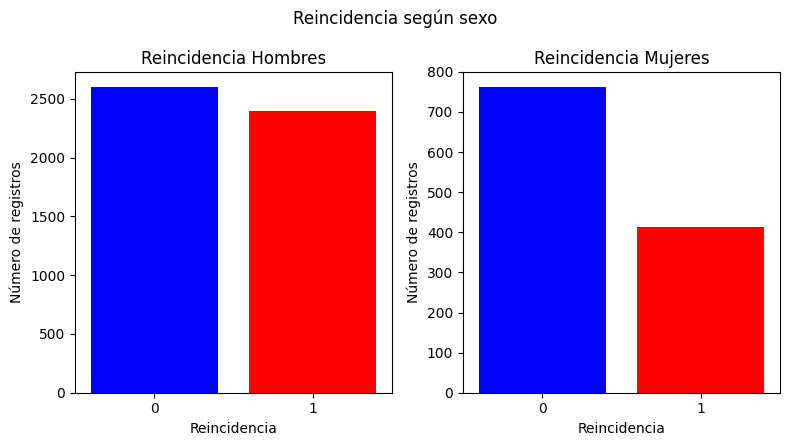

In [19]:
# Reincidencia según sexo.
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(data=male_data, x="two_year_recid", ax=ax[0])
sns.countplot(data=female_data, x="two_year_recid", ax=ax[1])

ax[0].set_title("Reincidencia Hombres")
ax[1].set_title("Reincidencia Mujeres")

ax[0].set_xlabel("Reincidencia")
ax[1].set_xlabel("Reincidencia")

ax[0].set_ylabel("Número de registros")
ax[1].set_ylabel("Número de registros")

# Cambiar color de las barras.
ax[0].patches[0].set_facecolor("blue")
ax[0].patches[1].set_facecolor("red")

ax[1].patches[0].set_facecolor("blue")
ax[1].patches[1].set_facecolor("red")

plt.suptitle("Reincidencia según sexo")

fig.tight_layout()


plt.show()

In [20]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["two_year_recid"],
    index=clean_df["sex"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

two_year_recid,0,1
sex,,
Female,64.851064,35.148936
Male,52.051231,47.948769


In [21]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["two_year_recid"],
    index=clean_df["sex"],
    aggfunc=lambda x: len(x),
    normalize="all",
) * 100

two_year_recid,0,1
sex,,
Female,12.346079,6.69151
Male,42.141931,38.82048


¿Existen diferencias en la reincidencia registrada por raza?

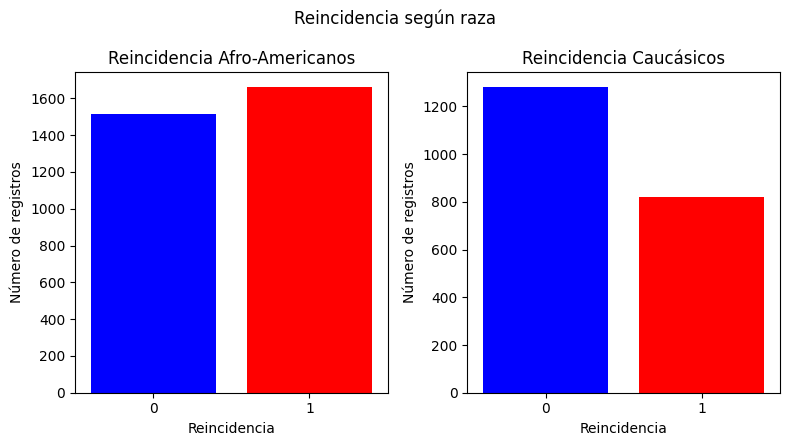

In [22]:
# Reincidencia según raza.

fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=am_data["two_year_recid"], ax=ax[0])
sns.countplot(x=cau_data["two_year_recid"], ax=ax[1])

ax[0].set_title("Reincidencia Afro-Americanos")
ax[1].set_title("Reincidencia Caucásicos")

ax[0].set_xlabel("Reincidencia")
ax[1].set_xlabel("Reincidencia")

ax[0].set_ylabel("Número de registros")
ax[1].set_ylabel("Número de registros")

# Cambiar color de las barras.
ax[0].patches[0].set_facecolor("blue")
ax[0].patches[1].set_facecolor("red")

ax[1].patches[0].set_facecolor("blue")
ax[1].patches[1].set_facecolor("red")

plt.suptitle("Reincidencia según raza")

fig.tight_layout()


plt.show()

In [23]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["two_year_recid"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

two_year_recid,0,1
race,,
African-American,47.685039,52.314961
Asian,74.193548,25.806452
Caucasian,60.912981,39.087019
Hispanic,62.868369,37.131631
Native American,54.545455,45.454545
Other,63.848397,36.151603


¿Existen diferencias en la reincidencia registrada por categoría de edad?

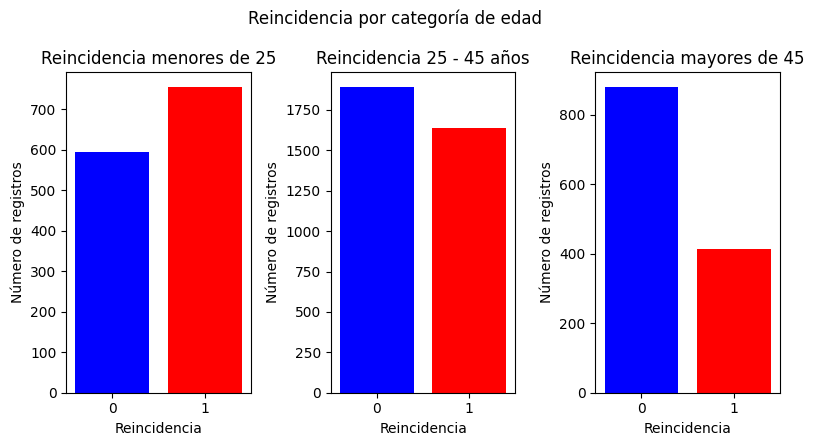

In [24]:
# Reincidencia según categoría de edad

fig, ax = plt.subplots(1, 3, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=less25_data["two_year_recid"], ax=ax[0])
sns.countplot(x=from25to45_data["two_year_recid"], ax=ax[1])
sns.countplot(x=greater45_data["two_year_recid"], ax=ax[2])


ax[0].set_title("Reincidencia menores de 25")
ax[1].set_title("Reincidencia 25 - 45 años")
ax[2].set_title("Reincidencia mayores de 45")

ax[0].set_xlabel("Reincidencia")
ax[1].set_xlabel("Reincidencia")
ax[2].set_xlabel("Reincidencia")

ax[0].set_ylabel("Número de registros")
ax[1].set_ylabel("Número de registros")
ax[2].set_ylabel("Número de registros")

# Cambiar color de las barras.
ax[0].patches[0].set_facecolor("blue")
ax[0].patches[1].set_facecolor("red")

ax[1].patches[0].set_facecolor("blue")
ax[1].patches[1].set_facecolor("red")

ax[2].patches[0].set_facecolor("blue")
ax[2].patches[1].set_facecolor("red")


plt.suptitle("Reincidencia por categoría de edad")

fig.tight_layout()


plt.show()

In [25]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["two_year_recid"],
    index=clean_df["age_cat"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

two_year_recid,0,1
age_cat,,
25 - 45,53.539071,46.460929
Greater than 45,67.981439,32.018561
Less than 25,44.023756,55.976244


¿Existen diferencias en la distribución de los puntajes de riesgo por sexo?

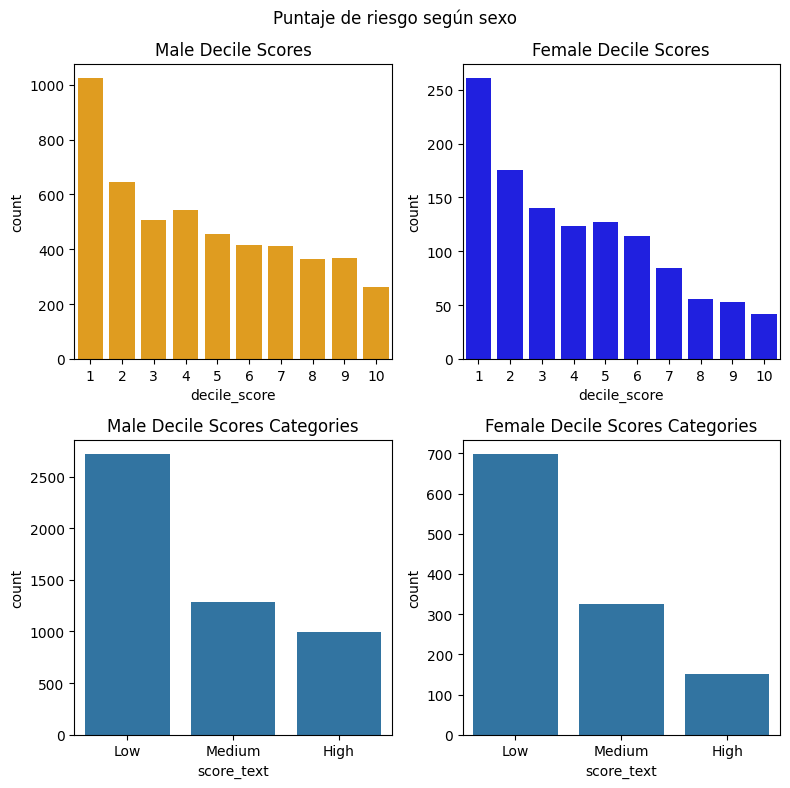

In [26]:
# Riesgo según sexo.
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()

sns.countplot(x=male_data["decile_score"], ax=ax[0], color="orange")
sns.countplot(x=female_data["decile_score"], ax=ax[1], color="blue")
sns.countplot(x=male_data["score_text"], ax=ax[2])
sns.countplot(x=female_data["score_text"], ax=ax[3])

ax[0].set_title("Male Decile Scores")
ax[1].set_title("Female Decile Scores")
ax[2].set_title("Male Decile Scores Categories")
ax[3].set_title("Female Decile Scores Categories")


plt.suptitle("Puntaje de riesgo según sexo")

fig.tight_layout()


plt.show()

¿Existen diferencias en la distribución de los puntajes de riesgo por raza?

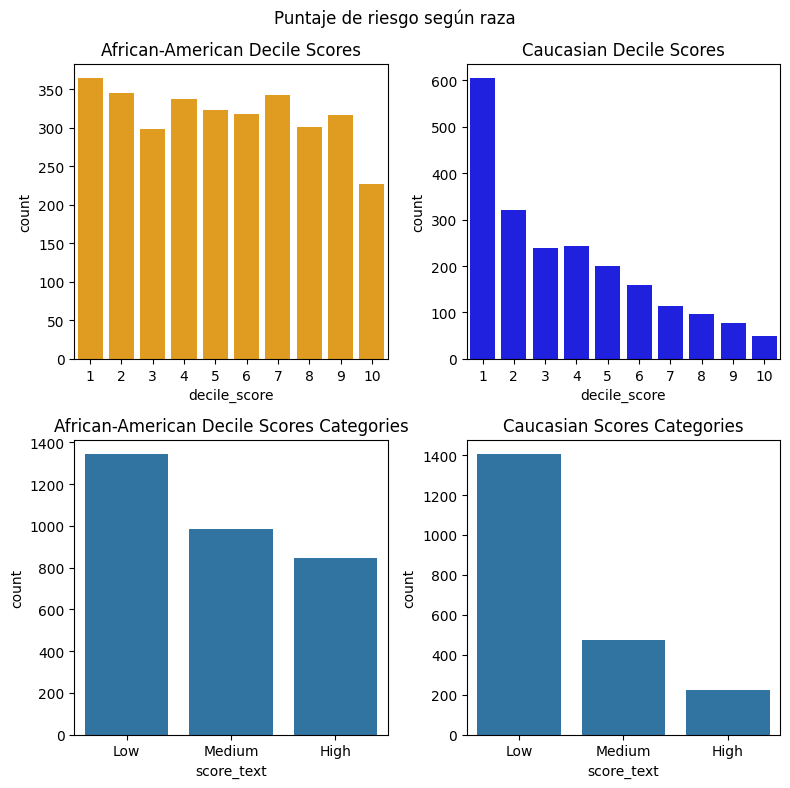

In [27]:
# Riesgo según raza.
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()

sns.countplot(x=am_data["decile_score"], ax=ax[0], color="orange")
sns.countplot(x=cau_data["decile_score"], ax=ax[1], color="blue")
sns.countplot(x=am_data["score_text"], ax=ax[2], order=["Low", "Medium", "High"])
sns.countplot(x=cau_data["score_text"], ax=ax[3], order=["Low", "Medium", "High"])

ax[0].set_title("African-American Decile Scores")
ax[1].set_title("Caucasian Decile Scores")
ax[2].set_title("African-American Decile Scores Categories")
ax[3].set_title("Caucasian Scores Categories")

plt.suptitle("Puntaje de riesgo según raza")

fig.tight_layout()


plt.show()

In [28]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["score_text"],
    index=clean_df["race"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

score_text,High,Low,Medium
race,,,
African-American,26.614173,42.393701,30.992126
Asian,9.677419,77.419355,12.903226
Caucasian,10.603899,66.904422,22.491679
Hispanic,9.233792,72.298625,18.467583
Native American,36.363636,27.272727,36.363636
Other,6.413994,79.591837,13.994169


¿Existen diferencias en la distribución de los puntajes de riesgo por categoría de edad?

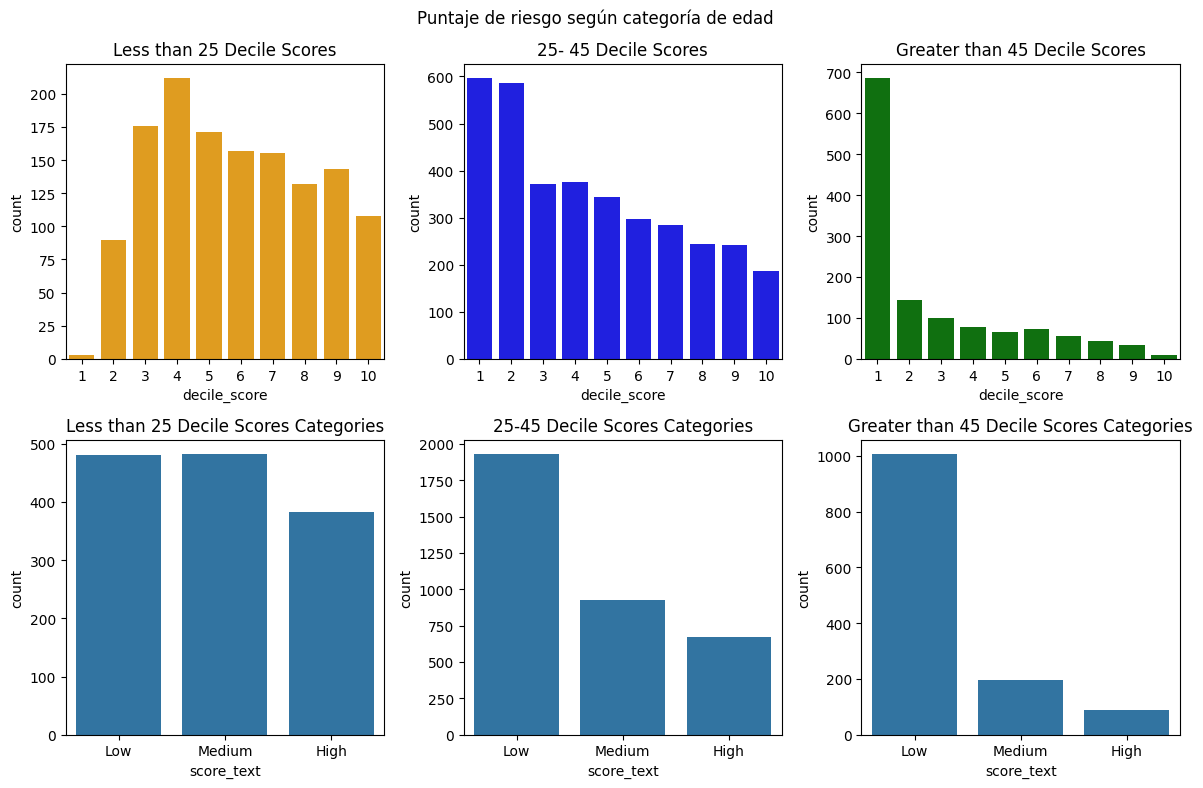

In [29]:
# Riesgo según categoría de edad.

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()

sns.countplot(x=less25_data["decile_score"], ax=ax[0], color="orange")
sns.countplot(x=from25to45_data["decile_score"], ax=ax[1], color="blue")
sns.countplot(x=greater45_data["decile_score"], ax=ax[2], color="green")

sns.countplot(x=less25_data["score_text"], ax=ax[3], order=["Low", "Medium", "High"])
sns.countplot(
    x=from25to45_data["score_text"], ax=ax[4], order=["Low", "Medium", "High"]
)
sns.countplot(x=greater45_data["score_text"], ax=ax[5], order=["Low", "Medium", "High"])

ax[0].set_title("Less than 25 Decile Scores")
ax[1].set_title("25- 45 Decile Scores")
ax[2].set_title("Greater than 45 Decile Scores")
ax[3].set_title("Less than 25 Decile Scores Categories")
ax[4].set_title("25-45 Decile Scores Categories")
ax[5].set_title("Greater than 45 Decile Scores Categories")


plt.suptitle("Puntaje de riesgo según categoría de edad")

fig.tight_layout()


plt.show()

In [30]:
pd.crosstab(
    values=clean_df["score_text"],
    columns=clean_df["score_text"],
    index=clean_df["age_cat"],
    aggfunc=lambda x: len(x),
    normalize="index",
) * 100

score_text,High,Low,Medium
age_cat,,,
25 - 45,19.054360,54.699887,26.245753
Greater than 45,6.805878,77.958237,15.235886
Less than 25,28.433556,35.708983,35.857461


## Pre - procesamiento (de utilidad para el uso de librerías con propósito ético)

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 675.1+ KB


In [32]:
object_columns = clean_df.select_dtypes(include="object").columns
for objcol in object_columns:
    print(f"Columna {objcol}: {clean_df[objcol].unique()}")

Columna c_charge_degree: ['F' 'M']
Columna race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
Columna age_cat: ['Greater than 45' '25 - 45' 'Less than 25']
Columna score_text: ['Low' 'Medium' 'High']
Columna sex: ['Male' 'Female']
Columna c_jail_in: ['2013-08-13 06:03:42' '2013-01-26 03:45:27' '2013-04-13 04:58:34' ...
 '2014-01-13 05:48:01' '2014-03-08 08:06:02' '2014-06-28 12:16:41']
Columna c_jail_out: ['2013-08-14 05:41:20' '2013-02-05 05:36:53' '2013-04-14 07:02:04' ...
 '2014-01-14 07:49:46' '2014-03-09 12:18:04' '2014-06-30 11:19:23']


In [33]:
object_columns = [
    x
    for x in clean_df.select_dtypes(include="object").columns
    if x != "c_jail_in" and x != "c_jail_out"
]

for objcol in object_columns:

    clean_df[objcol] = clean_df[objcol].astype("category")

In [34]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      6172 non-null   int64   
 1   c_charge_degree          6172 non-null   category
 2   race                     6172 non-null   category
 3   age_cat                  6172 non-null   category
 4   score_text               6172 non-null   category
 5   sex                      6172 non-null   category
 6   priors_count             6172 non-null   int64   
 7   days_b_screening_arrest  6172 non-null   float64 
 8   decile_score             6172 non-null   int64   
 9   is_recid                 6172 non-null   int64   
 10  two_year_recid           6172 non-null   int64   
 11  c_jail_in                6172 non-null   object  
 12  c_jail_out               6172 non-null   object  
dtypes: category(5), float64(1), int64(5), object(2)
memory usage: 464.8+

In [35]:
clean_df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


In [36]:
pd.get_dummies(clean_df["race"]).head()

,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,True,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,True,False,False,False


In [37]:
dummies = pd.get_dummies(clean_df["race"])
clean_df = pd.concat([clean_df, dummies], axis=1)
clean_df.drop(columns=["race", "Caucasian"], inplace=True)

In [38]:
clean_df.head()

,age,c_charge_degree,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other
0,69,F,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,False,False,False,False,True
1,34,F,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,True,False,False,False,False
2,24,F,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,True,False,False,False,False
5,44,M,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,False,False,False,False,True
6,41,F,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,False,False,False,False,False


In [39]:
post_df = clean_df.copy()

In [40]:
dummies = pd.get_dummies(post_df["age_cat"])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=["age_cat", "25 - 45"], inplace=True)

In [41]:
dummies = pd.get_dummies(post_df["sex"])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=["sex", "Male"], inplace=True)

In [42]:
dummies = pd.get_dummies(post_df["c_charge_degree"])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=["c_charge_degree", "M"], inplace=True)

In [43]:
post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other,Greater than 45,Less than 25,Female,F
0,69,Low,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,False,False,False,False,True,True,False,False,True
1,34,Low,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,True,False,False,False,False,False,False,False,True
2,24,Low,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,True,False,False,False,False,False,True,False,True
5,44,Low,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,False,False,False,False,True,False,False,False,False
6,41,Medium,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,False,False,False,False,False,False,False,False,True
